In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data_filepath = "D:/us_accident.csv"

In [4]:
df = pd.read_csv(data_filepath, nrows=100000)
print("Data loaded successfully.")
print(df.head(10))

Data loaded successfully.
     ID   Source  Severity        Start_Time          End_Time  Start_Lat  \
0   A-1  Source2         3  08-02-2016 05:46  08-02-2016 11:00  39.865147   
1   A-2  Source2         2  08-02-2016 06:07  08-02-2016 06:37  39.928059   
2   A-3  Source2         2  08-02-2016 06:49  08-02-2016 07:19  39.063148   
3   A-4  Source2         3  08-02-2016 07:23  08-02-2016 07:53  39.747753   
4   A-5  Source2         2  08-02-2016 07:39  08-02-2016 08:09  39.627781   
5   A-6  Source2         3  08-02-2016 07:44  08-02-2016 08:14  40.100590   
6   A-7  Source2         2  08-02-2016 07:59  08-02-2016 08:29  39.758274   
7   A-8  Source2         3  08-02-2016 07:59  08-02-2016 08:29  39.770382   
8   A-9  Source2         2  08-02-2016 08:00  08-02-2016 08:30  39.778061   
9  A-10  Source2         3  08-02-2016 08:10  08-02-2016 08:40  40.100590   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout Station   Stop  \
0 -84.058723      NaN      NaN          0.01  .

In [5]:
print("Number of columns:", len(df.columns))
print("Number of rows:", len(df))
df.info()


Number of columns: 46
Number of rows: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     25 non-null     object 
 1   Source                 25 non-null     object 
 2   Severity               25 non-null     int64  
 3   Start_Time             25 non-null     object 
 4   End_Time               25 non-null     object 
 5   Start_Lat              25 non-null     float64
 6   Start_Lng              25 non-null     float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           25 non-null     float64
 10  Description            25 non-null     object 
 11  Street                 25 non-null     object 
 12  City                   25 non-null     object 
 13  County                 25 non-null     object 
 14  State              

In [6]:
# Drop columns with a high percentage of missing values
missing_threshold = 0.3  # Set a threshold for dropping columns with more than 30% missing values
df = df.dropna(thresh=len(df) * (1 - missing_threshold), axis=1)
print("Dropped columns with more than 30% missing values.")


Dropped columns with more than 30% missing values.


In [7]:
# Separate categorical and numerical features
df_cat = df.select_dtypes('object').drop(['ID'], axis=1, errors='ignore')
df_num = df.select_dtypes(include=np.number)

In [8]:
# Drop columns that are not useful for analysis
df_cat.drop(['Description', 'Zipcode', 'Weather_Timestamp'], axis=1, inplace=True, errors='ignore')
df.drop(['Airport_Code'], axis=1, inplace=True, errors='ignore')


In [9]:

# Convert 'Start_Lng', 'Start_Lat', and 'Temperature(F)' to numeric (correct column names)
df['Start_Lng'] = pd.to_numeric(df['Start_Lng'], errors='coerce')
df['Start_Lat'] = pd.to_numeric(df['Start_Lat'], errors='coerce')
df['Temperature(F)'] = pd.to_numeric(df['Temperature(F)'], errors='coerce')


In [10]:
# Display the cleaned dataset
print("Cleaned dataset:")
print(df.head(10))

Cleaned dataset:
     ID   Source  Severity        Start_Time          End_Time  Start_Lat  \
0   A-1  Source2         3  08-02-2016 05:46  08-02-2016 11:00  39.865147   
1   A-2  Source2         2  08-02-2016 06:07  08-02-2016 06:37  39.928059   
2   A-3  Source2         2  08-02-2016 06:49  08-02-2016 07:19  39.063148   
3   A-4  Source2         3  08-02-2016 07:23  08-02-2016 07:53  39.747753   
4   A-5  Source2         2  08-02-2016 07:39  08-02-2016 08:09  39.627781   
5   A-6  Source2         3  08-02-2016 07:44  08-02-2016 08:14  40.100590   
6   A-7  Source2         2  08-02-2016 07:59  08-02-2016 08:29  39.758274   
7   A-8  Source2         3  08-02-2016 07:59  08-02-2016 08:29  39.770382   
8   A-9  Source2         2  08-02-2016 08:00  08-02-2016 08:30  39.778061   
9  A-10  Source2         3  08-02-2016 08:10  08-02-2016 08:40  40.100590   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to 

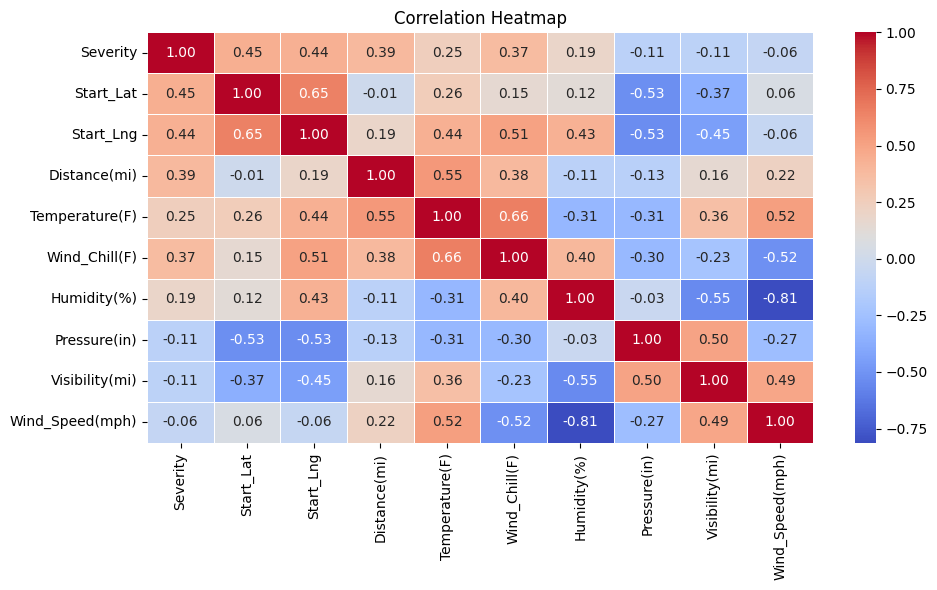

In [11]:
# Heatmap of numerical feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9464\1435741161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis', legend=False)


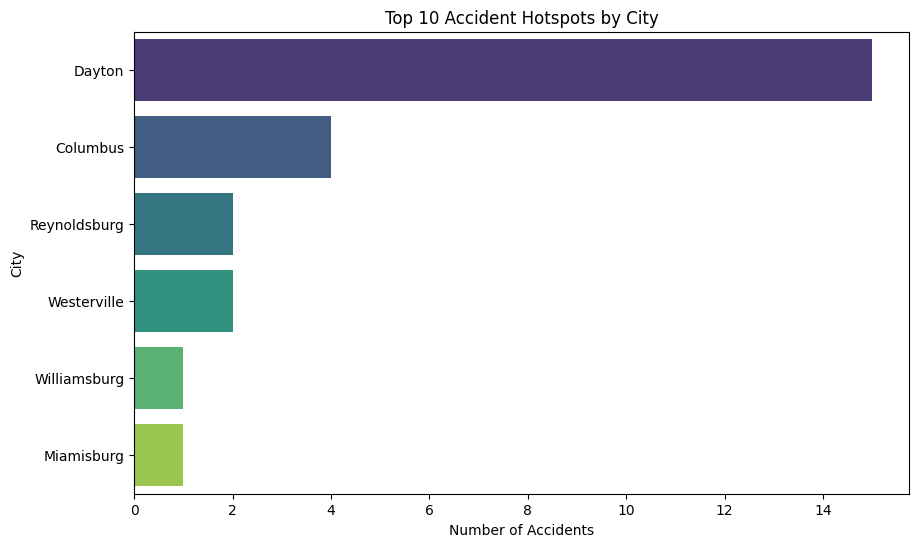

In [19]:
if 'City' in df.columns:
    plt.figure(figsize=(10, 6))
    top_cities = df['City'].value_counts().nlargest(10)
    sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis', legend=False)
 
    plt.title('Top 10 Accident Hotspots by City')
    plt.ylabel('City')
    plt.xlabel('Number of Accidents')
    plt.show()


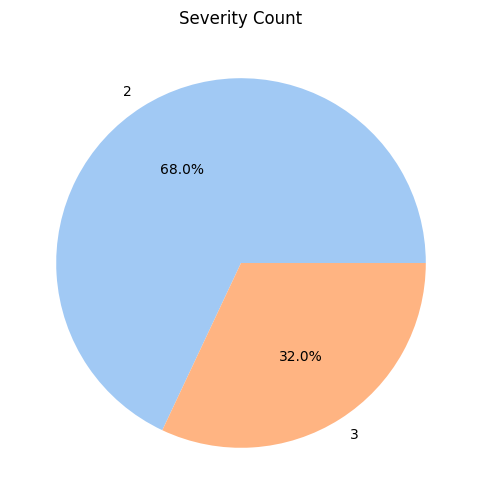

In [20]:
if 'Severity' in df.columns:
    plt.figure(figsize=(10, 6))
    severity_count = df['Severity'].value_counts()
    plt.pie(severity_count, labels=severity_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title('Severity Count')
    plt.show()

In [22]:
# Road conditions analysis (assuming there's a 'Road_Condition' column)
if 'Road_Condition' in df.columns:
    plt.figure(figsize=(10, 6))
    df['Road_Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title('Accidents by Road Condition')
    plt.ylabel('condition')
    plt.show()

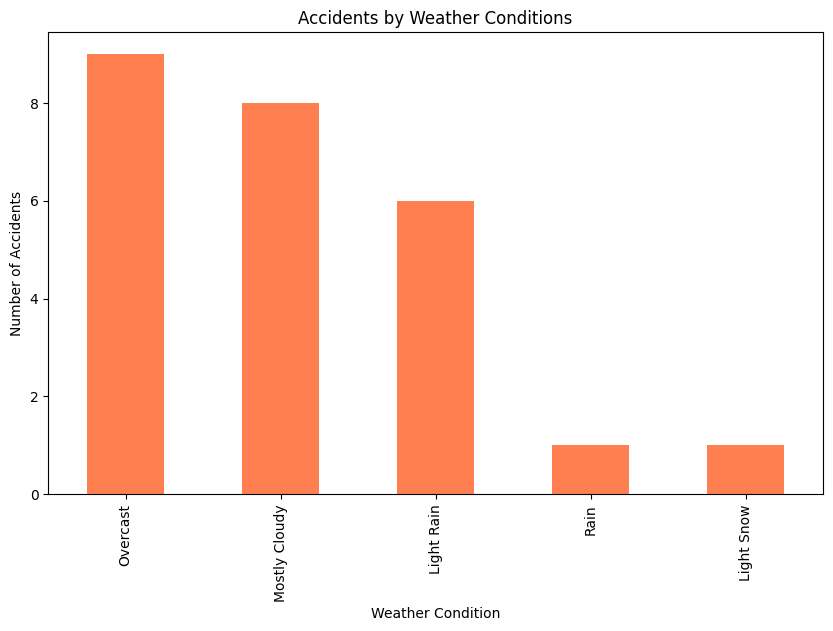

In [23]:

# Weather conditions analysis
if 'Weather_Condition' in df.columns:
    plt.figure(figsize=(10, 6))
    df['Weather_Condition'].value_counts().nlargest(10).plot(kind='bar', color='coral')
    plt.title('Accidents by Weather Conditions')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of Accidents')
    plt.show()

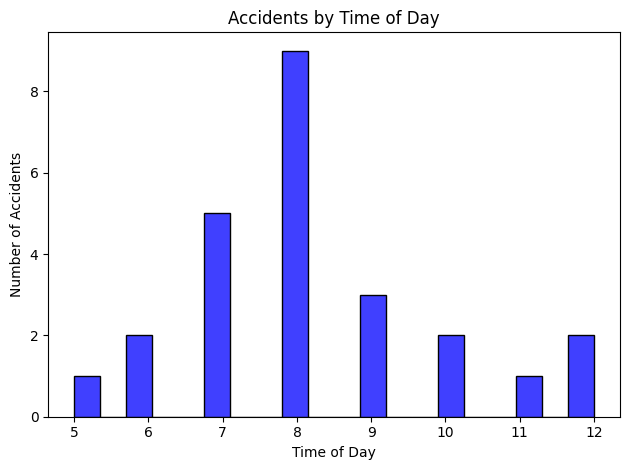

In [24]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hours'] = df['Start_Time'].dt.hour
sns.histplot(df['Hours'], bins=20, kde=False, color='blue')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

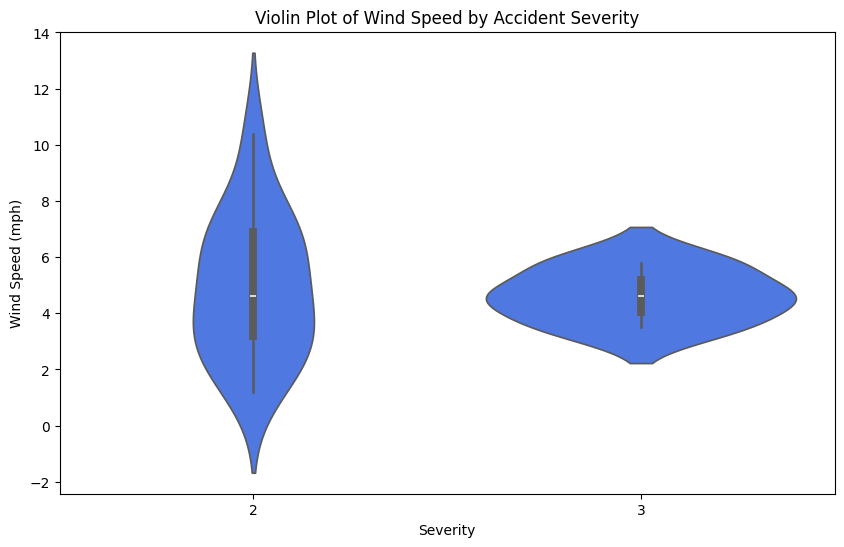

In [34]:
# Violin plot of wind speed by accident severity (if wind speed exists)
if 'Wind_Speed(mph)' in df.columns and 'Severity' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Severity', y='Wind_Speed(mph)', data=df)
    plt.title('Violin Plot of Wind Speed by Accident Severity')
    plt.ylabel('Wind Speed (mph)')
    plt.xlabel('Severity')
    plt.show()

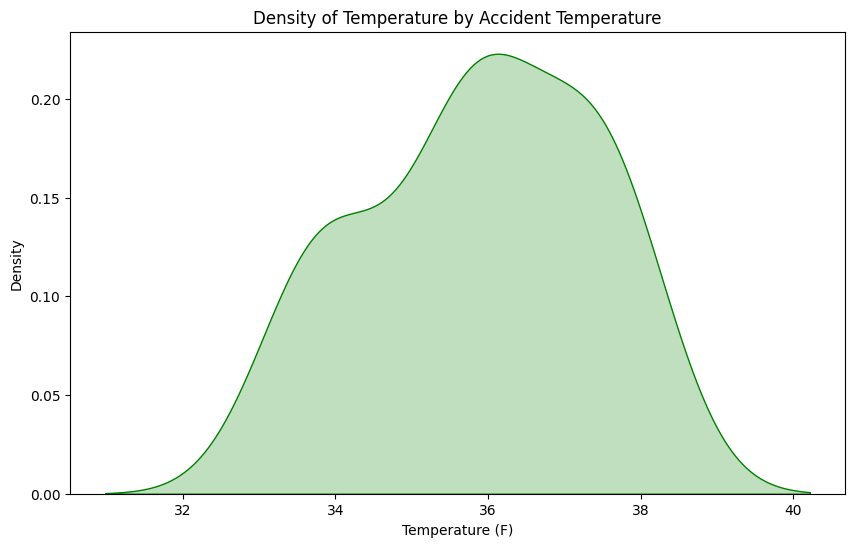

In [ ]:
# Density plot for temperature
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Temperature(F)'].dropna(), fill=True, color='green')
plt.title('Density of Temperature by Accident Temperature')
plt.ylabel('Density')
plt.xlabel('Temperature (F)')
plt.show()


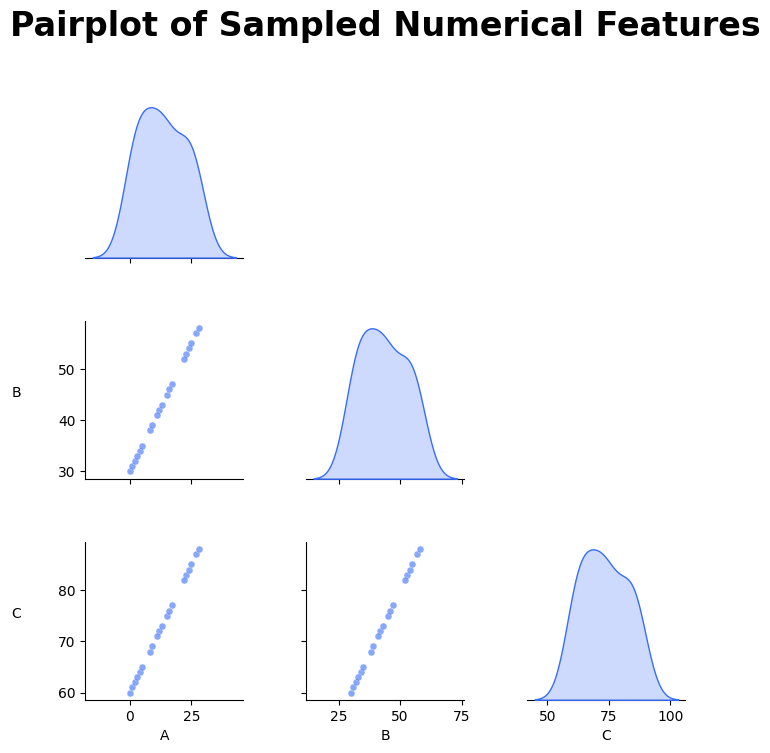

In [39]:
# Ensure that df_num is properly defined as numerical columns in df
df_num = df.select_dtypes(include=np.number)  # Select numerical columns

# Adjust the sample size for the pairplot based on the dataframe size
sample_size = min(len(df), 5000)  # Choose the smaller value between 5000 and the length of the dataframe

# Sample the DataFrame
df_sample = df.sample(n=sample_size, random_state=42)

# Check if df_num.columns exists and is not empty
if not df_num.empty and not df_num.columns.empty:
    # Generate the pairplot for the sampled data
    pairplot = sns.pairplot(df_sample[df_num.columns], diag_kind='kde', corner=True,
                            height=2.5, aspect=1.0, plot_kws={'s': 25, 'alpha': 0.6})

    # Set the title for the pairplot
    plt.suptitle('Pairplot of Sampled Numerical Features', y=1.02, fontsize=24, weight='bold')

    # Adjust the layout of the pairplot
    pairplot.fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)

    # Rotate the y-axis labels to be horizontal
    for ax in pairplot.axes.flat:
        if ax is not None:
            ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=30)

    # Show the plot
    plt.show()
else:
    print("No numerical columns found in df_num or df_num is empty.")
